# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2021 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

### 1) Anfangsbedingungen

**1.1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?**

Speichern Sie das Ergebnis (in Metern) in der Variablen `h0` und geben Sie sie aus.

In [2]:
from math import pi, sqrt

h0 = None 
# Constants
volume = 215 * 10**6  # m^3
oberflaeche = 10 * 10**6  # m^2
auslass = 2  # m^2

print(f"Fassungsvermoegen: {volume} m^3")
print(f"Oberflaeche: {oberflaeche} m^2")
print(f"Auslass: {auslass} m^2")
# Hier eigenen Code schreiben ...


# Oberfläche = pi * r**2
# r = sqrt(Oberfläche / pi)
# r = (oberflaeche / pi)**(1/2)
r_pow2 = oberflaeche / pi  # r_pow2 ist r quadrat. Man muss die Wurzel für die Formel nicht ziehen. 
print(f"r: {sqrt(r_pow2)} m")


# V = 1/3 * pi * r**2 * h
# h = (V*3) / (pi * r**2)
h0 = (volume * 3) / (pi * r_pow2)

print(h0)
print(f"Der See ist {round(h0, 1)} Meter Tief")



Fassungsvermoegen: 215000000 m^3
Oberflaeche: 10000000 m^2
Auslass: 2 m^2
r: 1784.1241161527712 m
64.5
Der See ist 64.5 Meter Tief


In [3]:
# Hier ist ein Plausibilitäts-Test:
assert 60 < h0 < 80

Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle, $p$ den hydrodynamischen Druck, $\rho$ die Dichte und $z$ die Höhe. $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung. Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$

**1.2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ (`u_unten0`) in m/s sowie den Volumenstrom $\dot{V_0}$ (`Vdot0`) in m³/s unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [4]:
u_unten0 = None
Vdot0 = None
# Variablen:

u = None  # Strömungsgeschwindigkeit
p = None  # hydrodynamischer Druck --> const
rho = None  # Dichte --> const

z = h0  # Höhe
g = 9.81  # Erdbeschleunigung / Gravitation
# existierende Variablen:
print(f"h0: {h0} m")
print(f"V: {volume} m^3")
print(f"Oberflaeche: {oberflaeche} m^2")
print(f"Auslass: {auslass} m^2")
# Hier eigenen Code schreiben ...

# Formel für die Strömungsgeschwindigkeit am Ausfluss
# sqrt(2 * g * z)
u_unten0 = sqrt(2 * g * z)

# Formel für Volumenstrom:
# u_unten0 * auslass 
Vdot0 = u_unten0 * auslass

print(f"Die Stroemungsgeschwindigkeit am Ausfluss betraegt {u_unten0} m/s")

print(f"Der Volumenstrom betraegt: {Vdot0} m^3/s")


h0: 64.5 m
V: 215000000 m^3
Oberflaeche: 10000000 m^2
Auslass: 2 m^2
Die Stroemungsgeschwindigkeit am Ausfluss betraegt 35.57372625969902 m/s
Der Volumenstrom betraegt: 71.14745251939804 m^3/s


In [5]:
# Hier sind einige Plausibilitäts-Tests:
assert u_unten0 > 30
assert Vdot0 < 80

Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [6]:
# Importiere pi aus numpy
from numpy import pi as pi_numpy

# Berechne den "Radius" der Seeoberfläche
r0 = (oberflaeche/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km


### 2) Leerung des Sees

**2.1) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees (in Metern) allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

In [7]:
tan_alpha = h0/r0
print(f"{'tan_alpha :':>10} {tan_alpha}")

# V = 1/3 * pi * r**2 * h
# r = Ankathete
# tan(alpha) = h(Gegenkathete) / r(Ankathete)
# r(Ankathete) = h(Gegenkathete) / tan(alpha)
# --> 
# V = 1/3 * pi * (h/tan(alpha))**2 *h
# V = 1/3 * pi * (h**3 / tan(alpha)**2 )
# --> 
# (V * tan(alpha)**2 * 3) / pi = h**3
# ((V * tan(alpha)**2 * 3) / pi)**(1/3) = h


def tiefe(V):
    """Returns h based on V and r"""
    global tan_alpha
    height = ((V * tan_alpha**2 * 3) / pi)**(1/3) 
    return height


print(tiefe(215000000))
print(f"Tiefe 215000000: {tiefe(215000000):2.1f}")
print(f"Tiefe 10*10**6: {tiefe(10*10**6):2.1f}")
print(f"Tiefe 1*10**6: {tiefe(1*10**6):2.1f}")
print(f"Tiefe 215000: {tiefe(215000):2.1f}")
    

tan_alpha : 0.03615219334576664
64.49999999999999
Tiefe 215000000: 64.5
Tiefe 10*10**6: 23.2
Tiefe 1*10**6: 10.8
Tiefe 215000: 6.4


In [8]:
# Hier sind einige Plausibilitäts-Tests:
assert abs(h0-tiefe(215e6)) < 1e-5
assert abs(50-tiefe(1e8)) < 0.1

**2.2) Schreiben Sie eine Funktion, die den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt.**

  * Die Funktion soll ein Startvolumen $V_0$ und eine Zeitschrittweite $\Delta t$ übergeben bekommen.
  * Verwenden Sie in den Berechnungen standardmäßig [SI-Einheiten](https://de.wikipedia.org/wiki/Internationales_Einheitensystem).
  * Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.
  * Die Funktion soll alle berechneten Zeiten und die jeweils zugehörigen Tiefen in zwei getrennten Listen zurückgeben.
  
Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.

In [9]:
def abfluss(V0, dt):
    # Hier eigenen Code schreiben ...
    global g
    global auslass 
    time_list = []
    tiefen_list = []
    
    time = 0
    while V0 > 0:
        z = tiefe(V0)
        tiefen_list.append(z)  # append depth 
        time_list.append(time)  # append time
        u_unten = sqrt(2 * g * z)  # update Strömungsgeschwindigkeit
        v_dot = u_unten * auslass  # update Volumenstrom
        V0 = V0 - v_dot * dt  # update Volume
        time += dt
    return time_list, tiefen_list
    

if __name__ == '__main__':
    volume = 215000000
    d_t = 6000  # sec

    time_l, tiefen_l = abfluss(volume, d_t)
    for i in range(len(time_l)):
        print(f"Time: {time_l[i]:<15}", f"Depth: {tiefen_l[i]:<20}")

    

Time: 0               Depth: 64.49999999999999   
Time: 6000            Depth: 64.45728324448247   
Time: 12000           Depth: 64.41452397144874   
Time: 18000           Depth: 64.37172206784832   
Time: 24000           Depth: 64.32887742014138   
Time: 30000           Depth: 64.28598991429587   
Time: 36000           Depth: 64.24305943578455   
Time: 42000           Depth: 64.20008586958194   
Time: 48000           Depth: 64.15706910016142   
Time: 54000           Depth: 64.11400901149214   
Time: 60000           Depth: 64.07090548703597   
Time: 66000           Depth: 64.02775840974444   
Time: 72000           Depth: 63.984567662055575  
Time: 78000           Depth: 63.941333125890914  
Time: 84000           Depth: 63.89805468265222   
Time: 90000           Depth: 63.85473221321838   
Time: 96000           Depth: 63.81136559794218   
Time: 102000          Depth: 63.76795471664708   
Time: 108000          Depth: 63.724499448624016  
Time: 114000          Depth: 63.68099967262805   


In [10]:
# Hier sind einige Plausibilitäts-Tests:
assert len(abfluss(10,1))==2
assert type(abfluss(10,1)[0])==type(abfluss(10,1)[1])==list

**2.3) Wie lange dauert es, bis der Stausee komplett abgelassen wurde?** 

Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:
  * $\Delta t_1$ = 1 Minute
  * $\Delta t_2$ = 4 Tage

**Diskutieren Sie Auffälligkeiten.**

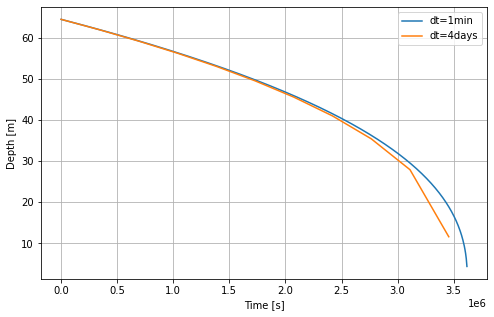

'Wenn man die Plots miteinander vergleicht, fällt natürlich auf, dass gerade am Schluss die Ergebnisse voneinander abweichen, \nbzw. 4 Tage sehr ungenau sind beim Messen.'

In [21]:
%matplotlib inline
from matplotlib.pyplot import plot, show, legend, xlabel, ylabel, grid, figure
# Plotbefehl: plot(x_werte_liste, y_werte_liste)

# Hier eigenen Code schreiben ..
volume = 215000000
d_t = 60 # 60 sec
time_1min, tiefen_1min = abfluss(volume, d_t)
d_t = 60 * 60 * 24 * 4  # 4 Tage

time_4d, tiefen_4d = abfluss(volume, d_t)

figure(1, figsize=(8, 5))
fig_1 = plot(time_l, tiefen_l, label='dt=1min')
fig_2 = plot(time_4d, tiefen_4d, label='dt=4days')
legend()
xlabel('Time [s]')
ylabel('Depth [m]')
grid()

show()

"""Wenn man die Plots miteinander vergleicht, fällt natürlich auf, dass gerade am Schluss die Ergebnisse voneinander abweichen, 
bzw. 4 Tage sehr ungenau sind beim Messen."""

### 3) Anderer See

Wiederholen Sie Aufgabenteil 2.3) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Schreiben Sie hierfür möglichst wenig neuen Code.

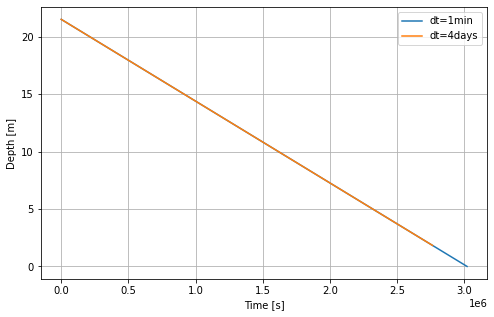

In [31]:
# Hier eigenen Code schreiben ...
# Zylinder: V = pi * r^2 * h
# --> 215000000 = pi * r^2 * h

h_zylinder = volume / (pi * r_pow2)
h_zylinder

def ablass_zylinder(vol, dt):
    global g 
    global auslass
    global r_pow2

    time_list = []
    depth_list = []
    time = 0
    while vol > 0:
        depth_list.append(vol / (pi * r_pow2))
        time_list.append(time)
        time += dt
        u_unten = sqrt(2 * g * z)
        v_dot = u_unten * auslass
        vol = vol - v_dot*dt

    return time_list, depth_list

if __name__ == '__main__':
    volume = 215000000
    dt = 60  # 1 min
    x, y = ablass_zylinder(volume, dt)
    figure(2, figsize=(8, 5))
    plot(x, y, label='dt=1min')
    dt = 60 * 60 * 24 * 4  # 4 Tage
    n, m = ablass_zylinder(volume, dt)
    plot(n,m, label='dt=4days')
    legend()
    xlabel('Time [s]')
    ylabel('Depth [m]')
    grid()

    show()
